/usr/lib/python3.9/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/lib/python3.9/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

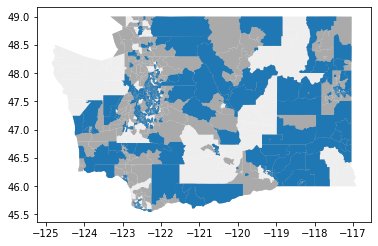

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

shapes = gpd.read_file('/course/food_access/tl_2010_53_tract00/tl_2010_53_tract00.shp')
data = pd.read_csv('/course/food_access/food_access.csv')

merged_data = shapes.merge(data, left_on='CTIDFP00',
                               right_on='CensusTract', how='left')
data = gpd.GeoDataFrame(merged_data, geometry='geometry')
has_data = data.dropna()
has_data['comb_low'] = has_data['lapophalf'] + has_data['lapop10']
urban_crit1 = has_data['Urban'] == 1
urban_crit2 = (has_data['comb_low'] >= 500) | (has_data['comb_low'] >= has_data['POP2010']/3)
rural_crit1 = has_data['Rural'] == 1
Rural_crit2 = (has_data['lapop10'] >= 500) | (has_data['lapop10'] >= has_data['POP2010']/3)
fig, ax = plt.subplots(1)
data.plot(color='#EEEEEE', ax=ax)
has_data.plot(color='#AAAAAA', ax=ax)
has_data[(urban_crit1 & urban_crit2) | (rural_crit1 & Rural_crit2)].plot(ax=ax)